# Wine Club Data Analysis - Part 1: Databases

I finally got around to doing the converting necessary to get this wine dataset in workable order. I'll keep updating this post as I get around to doing more analysis. I'm doing this in IPython, you can download the notebook at the bottom of the page.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'savefig.dpi' : 100})
sns.set_context("paper")
sns.set_style("darkgrid")

The databases are stored as CSV files, which I generated after much bash-scripted from the original excel document. You can download the files here: [wines.csv]({{ site.url }}/notebooks/wines.csv), [scores.csv]({{ site.url }}/notebooks/scores.csv), and [nights.csv]({{ site.url }}/notebooks/nights.csv),

In [3]:
wines = pd.read_csv('wines.csv', index_col=0)
scores = pd.read_csv('scores.csv', index_col=0)
nights = pd.read_csv('nights.csv')

The wines database lists each wine, with relevant descriptions

In [4]:
wines.tail()

,order,Wine Name,Region,Year,Price,Purchaser,season,night
279,4,Albardiales,Spain,2013,11,Matt/Allie,3,16
280,5,Red Guitar Old Vine Tempranillo-Grenache (52%/...,Navara,2011,NaN,NateY/Jack,3,16
281,6,Tolosa Seasonal Selection,Paso Robles,2012,20,Erin/Evan,3,16
282,7,Hazana Tradicion Rioja,NaN,2011,13,NateE,3,16
283,8,Milflores Rioja,"Laguardia, Espana",NaN,8,NateK,3,16


Similarly, the scores database contains information on each tasting

In [5]:
scores.tail()

,Name,Score,wine,season,night,order,Nose,Flavor,Finish,Overall,Comments
3191,Allie,10,283,3,16,8,3,2,2,3,"floral, tannic, hot"
3192,Grace,7,283,3,16,8,2,2,1,2,"burns, harsh"
3193,Davey,10,283,3,16,8,1,2,2,5,tinge to it around the edges; strawberry muted
3194,Luke,13,283,3,16,8,NaN,NaN,NaN,NaN,NaN
3195,Kaylan,13,283,3,16,8,4,2,2,5,"fruity nose, bitter finish"


The nights database holds information on each individual night, including the varietal chosen and number of wines we drunk.

In [6]:
nights.head()

,season,night,Date,Varietal,numwines
0,1,1,27-Mar-2012,Zinfandel,4
1,1,2,1-Apr-2012,Chardonnay,7
2,1,3,9-Apr-2012,Petit Sirah,5
3,1,4,16-Apr-2012,Syrah,9
4,1,5,23-Apr-2012,Pinot Noir,8


## Number of tastings per person
Some of us have been to wine club more frequently (or longer) than others, so its useful to visualize the number of datapoints we have per person.

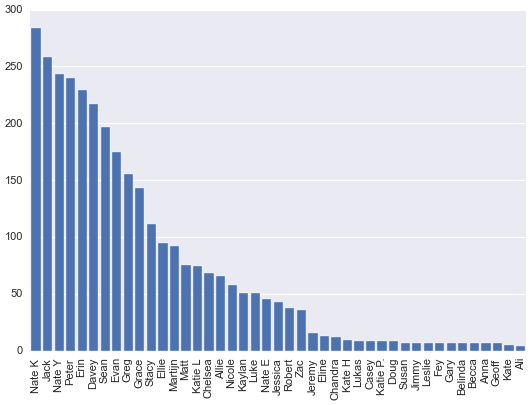

In [7]:
tastings = scores.groupby('Name').count().Score.copy()
tastings.sort()
plt.figure()
ax = sns.barplot(x = np.arange(len(tastings)), y = tastings.values[::-1])
tl = ax.set_xticklabels(tastings.index[::-1], rotation=90)

## Average score per person
We don't want anyone to have a higher overall weight on a wines averaged score, so we'll next look on how well we each do on sticking to a consistent scoring basis. (Note, ratings from season 1 have already been re-normalized to 0-21). We're also not too interested in people who have only shown up once or twice ("Are you guys playing some sort of game?"), so we'll make the cuttoff at Zac and above (sorry Jeremy)

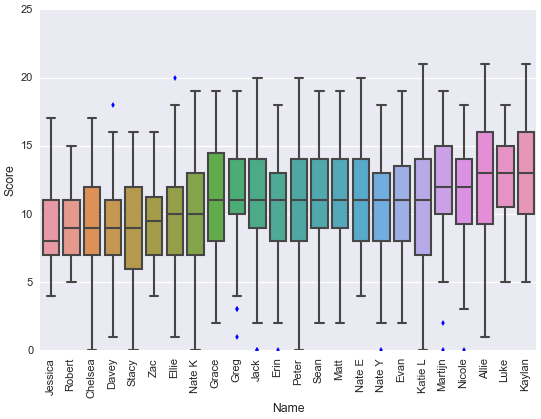

In [9]:
best_tasters = tastings[tastings >= tastings['Zac']].index.values
pruned_scores = scores[scores.Name.isin(best_tasters)]
order = pruned_scores.groupby('Name').median().Score.argsort()
ax = sns.boxplot(vals=pruned_scores.Score, groupby=pruned_scores.Name, order=order.index[order.values])
tl = plt.setp(ax.get_xticklabels(), rotation=90)

Easy there Luke / Kaylan, we all like wine, but not _that_ much :)
